In [1]:
"""
- IMDB 리뷰 데이터셋

load_data()함수의 num_words 매개변수를 500으로 지정
"""

'\n- IMDB 리뷰 데이터셋\n\nload_data()함수의 num_words 매개변수를 500으로 지정\n'

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [3]:
"""
훈련 세트와 테스트 세트의 크기를 확인
"""
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
"""
훈련 세트의 배열은 1차원임 
리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다

즉 앞의 그림처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열

첫 번째 리뷰의 길이를 출력
"""
print(len(train_input[0]))


218


In [5]:
"""
두 번째 리뷰의 길이를 확인
"""
print(len(train_input[1]))

189


In [6]:
"""
리뷰마다 각각 길이가 다름
여기서 하나의 리뷰가 하나의 샘플이 됨
첫 번째 리뷰에 담김 내용을 출력

텐서플로에 있는 IMDB 리뷰데이터는 이미 정수로 변환되어 있다
앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있다
따라서 어휘 사전에 없는 단어는 모두 2로 표시되어 나타남
"""
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
"""
타깃 데이터를 출력

해결할 문제는 리뷰가 긍정인지 부정인지 판단하는것
그러면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)으로 나누어짐
"""
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
"""
훈련세트에서 검증 세트를 떼어 놓도록 함
원래 훈련 세트의 크기가 25000개였으므로 20%를 검증 세트로 떼어 놓음
훈련 세트의 크기는 2000개로 줄어들것
"""
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)


In [9]:
"""
훈련 세트에 대해 몇가지 조사
각 리뷰의 길이를 계산해 넘파이 배열에 담아봄 - 이유 리뷰 길이 맞추기 -패딩
이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하기
넘파이 리스트 내포를 사용해 train_input 의 원소를 순회하면서 길이를 측정
"""
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [10]:
"""
lengths 배열이 준비되었으므로 넘파이 mean()함수와 median()함수를 사용해
리뷰 길이의 평균과 중간값을 구함
"""
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


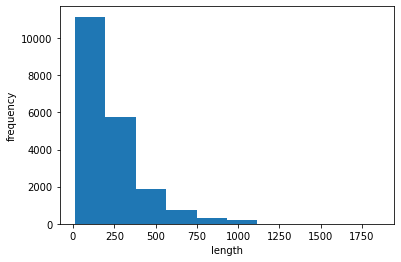

In [11]:
"""
리뷰의 평균 단어 개수는 239개 
중간값이 178임 
리뷰 길이 데이터는 한쪽에 치우친 분포로 보임
lengths 배열을 히스토그램으로 표현
"""
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [12]:
"""
한쪽으로 치우친 모습 
대부분의 리뷰 길이는 300 미만
평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문

리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용함
하지만 여전히 100개의 단어보다 작은 리뷰가 있다
이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요함
보통 패딩을 나타내는 토큰으로는 0을 사용함

물론 수동으로 훈련 세트에 있는 20000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 
0으로 패딩 할 수 있다
케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences()함수를 제공함
이 함수를 사용해 train_input의 길이를 100으로 맞춤
"""
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
"""
사용법은 간단함
maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고
짧은 경우는 0으로 패딩
패딩 된 결과가 어떻게 나타나는지 확인
train_seq의 크기를 확인

길이를 100으로 맞춘 train_seq는 이제(20000, 100)크기의 2차원 배열이 됨
"""
print(train_seq.shape)

(20000, 100)


In [14]:
"""
train_seq에 있는 첫 번쨰 샘플을 출력
"""
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [15]:
"""
train_seq[0] 샘플은 앞뒤에 패딩값 0 이 없는 것으로 보아 100보다는 길었을 것 같다
그럼 원래 샘플의 앞부분이 잘렸을까 뒷부분이 잘렸을까
train_input에 있는 원본 샘플의 끝을 확인해 봄

샘플의 앞부분이 잘렸다는 것을 짐작할수 있다
"""
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [16]:
"""
pad_sequences()함수는 기본으로 maxlen 보다 긴 시퀀스의 앞부분을 자름
이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문
영화 리뷰 데이터를 생각해 보면 리뷰 끝에 뭔가 결정적인 소감을 말할 가능서이 높다고 봄
만약 시퀀스의 뒷 부분을 잘라내고 싶다면 pad_sequences()함수의 truncating 매개변수의 값을 기본값"pre"가 아닌 "post"로 바꾸면 됨

train_seq에 있는 여섯 번째 샘플을 출력
"""
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [17]:
"""
앞부분에 0이 있는 것으로 보아 샘플의 길이는 100이 안된듯

검증 세트의 길이도 100으로 맞춰봄
이렇게 훈련 세트와 검증 세트 준비 완료
"""
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
"""
- 순환 신경망 만들기

케라스는 여러 종류의 순환층 클래스를 제공
그중에 가장 간단한 것은 SimpleRNN 클래스임
IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층으 1개의 뉴런을 가지고 시그모이드 활성화 함수를 
사용해야함
먼저 케라스의 Sequential 클래스로 만든 신경망 코드를 보자

SimpleRNN클래스를 사용
첫 번째 매개변수는 사용할 뉴런의 개수로 input_shape에 입력 차원을(100, 500)으로 지정
첫 번째 차원이 100인 것은 앞에서 샘플의 길이를 100으로 지정했기 때문

순환층도 당연히 활성화 함수를 사용. simpleRNNㅡㄹ래스의 activation 매개변수의 기본값은 "tanh" 하이퍼볼릭 탄젠트 함수를 사용
여기서는 기본값을 그대로 사용

imdb.load_data()함수에서 500개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 500개임
즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩토큰)에서 499까지임
따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 함

"""
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [19]:
"""
케라스에는 원-핫 인코딩을 위한 유틸리티를 제공함
keras.utils 패키지 아래에 있는 
to_categorical()함수 
정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환해 줌
"""
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
"""
먼저 train_seq를 원-핫 인코딩으로 변환하여 
train_oh 배열을 만들었다
이 배열의 크기를 출력
"""
print(train_oh.shape)

(20000, 100, 500)


In [21]:
"""
정수 하나마다 모두 500차원의 배열로 변경 되었기 때문에
(20000, 100)크기의 train_seq가 (20000, 100, 500) 크기의 train_oh로 바뀜
이렇게 샘플 데이터의 크기가 1차원 정수 배열(100,)에서 2차원 배열(100, 500)로 바꿔야 하므로
SimpleRNN클래스의 input_shape 매개변수의 값을(100, 500)으로 지정함

train_oh의 첫 번째 샘플의 첫 번째 토큰10이 잘 인코딩 되었는지 출력
"""
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [22]:
"""
처음 12개 원소를 출력해 보면 열한 번째 원소가 1인 것을 확인할 수 있다
나머지 원소는 모두 0인 상태
sum()함수로 모든 원소의 값을 더해서 확인 가능
"""
print(np.sum(train_oh[0][0]))

1.0


In [23]:
"""
토큰 10이 잘 인코딩된 것 같다 
열한 번쨰 원소만 1이고 나머지는 모두 0이어서 원-핫인코딩 배열의 값을 모두 더한 결과가 1이 됨
같은 방식으로 val_seq도 원-핫 인코딩으로 바꿔봄
"""
val_oh = keras.utils.to_categorical(val_seq)

In [24]:
"""
훈련 세트와 검증 세트가 모두 준비됨
앞서 만든 모델의 구조를 출력

simpleRNN에 전달한 샘플의 크기는 (100, 500)이지만 
이 순환층은 마지막 타임스탭의 은닉 상태만 출력
이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인

순환층에 사용된 모델 파라미터의 개수 확인
입력 토큰은 500차원의 원-핫 인코딩 배열
이 배열이 순환층의 뉴런8개와 완전히 연결되기 때문에 총 500 X 8 = 4000개의 가중치가 있다
순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐
이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기)  X 8(뉴런 개수) = 64개의 가중치가 필요
마지막으로 뉴런 마다 하나의 절편이 있다
따라서 모두 4000 + 64 + 8 = 4072개의 모델 파라미터가 필요

케라스 API를 사용해 순환 신경망 모델을 손쉽게 만듬
순환 신경망 모델을 훈련
"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [25]:
"""
- 순환 신경망 훈련하기

이 예에서는 기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 만들어
학습률을 0.0001로 지정 
그다음 에포크 횟수를 100으로 늘리고 배치 크기를 64개로 설정
그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일
"""
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs =100, batch_size=64, validation_data=(val_oh, val_target),
                   callbacks =[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 36s 113ms/step - loss: 0.6973 - accuracy: 0.5186 - val_loss: 0.6851 - val_accuracy: 0.5532
Epoch 2/100
313/313 [==============================] - 35s 111ms/step - loss: 0.6741 - accuracy: 0.5834 - val_loss: 0.6638 - val_accuracy: 0.6066
Epoch 3/100
313/313 [==============================] - 34s 110ms/step - loss: 0.6532 - accuracy: 0.6301 - val_loss: 0.6468 - val_accuracy: 0.6402
Epoch 4/100
313/313 [==============================] - 34s 110ms/step - loss: 0.6341 - accuracy: 0.6617 - val_loss: 0.6286 - val_accuracy: 0.6684
Epoch 5/100
313/313 [==============================] - 34s 109ms/step - loss: 0.6138 - accuracy: 0.6902 - val_loss: 0.6082 - val_accuracy: 0.6940
Epoch 6/100
313/313 [==============================] - 33s 105ms/step - loss: 0.5931 - accuracy: 0.7149 - val_loss: 0.5936 - val_accuracy: 0.7074
Epoch 7/100
313/313 [==============================] - 34s 110ms/step - loss: 0.5764 - accuracy: 0.7302 - val_loss: 0.5757 -

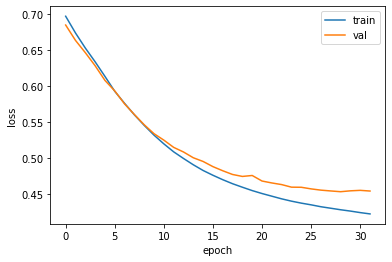

In [26]:
"""
훈련 손실과 검증 손실을 그래프로 그려서 훈련 과정을 살펴봄

훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 스무 번째 에포크에서 감소가 둔해지고있다
적절한 에포크에서 훈련을 멈춤

"""
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

In [27]:
"""
한가지 생가갈 점이 있다
이 작업을 하기 위해서 입력 데이터를 원-핫 인코딩으로 변환했다
원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 점
실제로 tain_seq 배열과 train_oh 배열의 nbytes 속성을 출력하여 크기를 확인

토큰 1개로 500차원으로 늘렸기 때문에 대략 500배가 커짐
좋은 방법은 아닌것 같다 - 단어 임베딩 사용하기
"""
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [28]:
"""
- 단어 임베딩을 사용하기

순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 단어 임베딩 임
단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꿔줌

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것
즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있다
이 때문에 메모리를 훨씬 효율적으로 사용

임베딩도(100,) 크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘림
하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있다

Embedding 클래스를 SimpleRNN 층 앞에서 추가한 두 번째 순환 신경망을 만들어 봄

Embedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기

두 번째 매개변수(16)는 임베딩 벡터의 크기

세 번째 input_length 매개변수는 입력 시퀀스의 길이 - 샘플의 길이를 100으로 맞춤
"""
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [29]:
"""
모델의 구조 출력

Embedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에 
총 500 X 16 = 8000개의 모델 파라미터를 가짐

그 다음 Simple RNN층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해
필요한 가중치 16 X 8 = 128개를 가짐
또한 은닉 상태에 곱해지는 가중치 8 X 8 = 64개 있다
마지막 8개의 절편이 있으므로 
전체 모델 파라미터의 개수는 128 + 64 + 8 =200

마지막 Dense층의 가중치 개수는 이전과 동일하게 9 개 
"""
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [30]:
"""
원-핫 인코딩보다 SimpleRNN에 주입되는 입력의 크기가 크게 줄었지만 
임베딩 벡터는 단어를 잘 표현하는 능력이 있기 때문에 
훈련 결과는 좋을것
모델 훈련 과정은 이전과 동일 train_oh 없고 train_seq 이런거 잘봐, model2 인거 잘보고
"""
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-embedding-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs =100, batch_size=64, validation_data=(val_seq, val_target),
                   callbacks =[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 40s 127ms/step - loss: 0.6871 - accuracy: 0.5459 - val_loss: 0.6642 - val_accuracy: 0.6188
Epoch 2/100
313/313 [==============================] - 40s 128ms/step - loss: 0.6455 - accuracy: 0.6690 - val_loss: 0.6347 - val_accuracy: 0.6912
Epoch 3/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6196 - accuracy: 0.7090 - val_loss: 0.6153 - val_accuracy: 0.7124
Epoch 4/100
313/313 [==============================] - 40s 127ms/step - loss: 0.5988 - accuracy: 0.7314 - val_loss: 0.6027 - val_accuracy: 0.7112
Epoch 5/100
313/313 [==============================] - 41s 132ms/step - loss: 0.5811 - accuracy: 0.7427 - val_loss: 0.5873 - val_accuracy: 0.7292
Epoch 6/100
313/313 [==============================] - 40s 127ms/step - loss: 0.5638 - accuracy: 0.7552 - val_loss: 0.5709 - val_accuracy: 0.7350
Epoch 7/100
313/313 [==============================] - 40s 129ms/step - loss: 0.5474 - accuracy: 0.7643 - val_loss: 0.5538 -

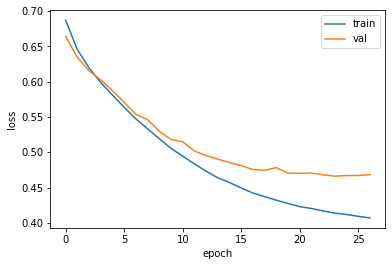

In [31]:
"""
출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냄
반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어듬
마지막으로 훈련 손실과 검증 손실을 그래프로 출력
"""
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()